# ***Weather Prediction***

Import pandas library and store the csv file into variable called weather, Start from the DATE column

In [1]:
import pandas as pd

weather = pd.read_csv('weather.csv', index_col='DATE')

weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.51,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,15.88,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,8.72,NaN,4.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Start cleaning up data to make sure no columns have a missing value

Display the amount of missing values in a column as a percentage

In [2]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.520377
ACSH       0.520327
AWND       0.256697
FMTM       0.494987
PGTM       0.387689
PRCP       0.000000
SNOW       0.000000
SNWD       0.000200
TAVG       0.654662
TMAX       0.000000
TMIN       0.000000
TSUN       0.998454
WDF1       0.520577
WDF2       0.481269
WDF5       0.485409
WDFG       0.744550
WDFM       0.999950
WESD       0.697162
WSF1       0.520427
WSF2       0.481269
WSF5       0.485459
WSFG       0.627725
WSFM       0.999950
WT01       0.631267
WT02       0.934903
WT03       0.932858
WT04       0.982741
WT05       0.981843
WT06       0.990921
WT07       0.994613
WT08       0.802614
WT09       0.993016
WT11       0.999302
WT13       0.891006
WT14       0.955754
WT15       0.997905
WT16       0.671921
WT17       0.997007
WT18       0.941787
WT19       0.999950
WT21       0.999751
WT22       0.997556
WV01       0.999950
dtype: float64

Create a variable to store all the columns in the weather file that have at least 5% data

In [3]:
valid_columns = weather.columns[null_pct < .05]

valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

Change the weather dataset so that only contains the valid_columns, lowercase the column names so that they are easier to reference later

In [4]:
weather = weather[valid_columns].copy()

weather.columns = weather.columns.str.lower()

weather


,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44


Fill in the missing value using the pandas ffill() method

In [5]:
weather = weather.ffill()

weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

Make sure columns have the correct data types

In [6]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

Check the data type of the index (DATE)

In [7]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-11-10', '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14',
       '2024-11-15', '2024-11-16', '2024-11-17', '2024-11-18', '2024-11-19'],
      dtype='object', name='DATE', length=20047)

Change the data type of the index from object to datetime

In [8]:
weather.index = pd.to_datetime(weather.index)

weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-11-10', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15', '2024-11-16', '2024-11-17',
               '2024-11-18', '2024-11-19'],
              dtype='datetime64[ns]', name='DATE', length=20047, freq=None)

Make sure there is no gaps in data 

In [9]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    324
Name: count, dtype: int64

Plot a column to make sure there are no gaps using the pandas plot method

<Axes: xlabel='DATE'>

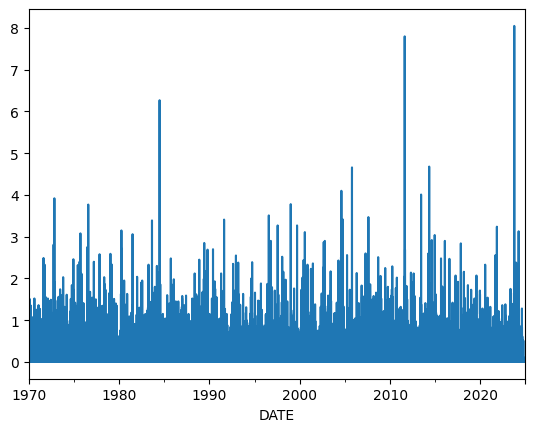

In [10]:
weather['prcp'].plot()

Create a target column that stores the next days tmax using the shift method

In [11]:
weather['target'] = weather.shift(-1)['tmax']

weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0


Fill the last value using the ffill method

In [12]:
weather = weather.ffill()

weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0


### Start the machine learning (Ridge Regression Model)

Import the ridge regression model

In [13]:
from sklearn.linear_model import Ridge


Initialize the ridge regression model (lambda = alpha in python)

In [14]:
rr = Ridge(alpha=.1)

Create a predictor variable to store columns that are not named target, name, or station

In [15]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

Create a function to make sure that future data does not predict past data. <br><br>
The function will:
1. Take in the weather data frame, the regression model, make sure that at least 10 years of data is present and predict based on a 90 day period
2. Store predictions in a list
3. Create a for loop to predict based on a 90 day period and store them in a list
4. return the predictions list

In [16]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    # Loop starts at the start parameter, stops at the end of the data set, and steps 90 days
    for i in range(start, weather.shape[0], step):

        #Create a training set: all of the rows in the data up to i
        #All of the data that comes before the current row is used as traing data
        train = weather.iloc[:i,:]

        #Create a test set: all of the rows from i to i+step
        #Data from the next 90 days to make a prediction
        test = weather.iloc[i:(i+step),:]

        # Fit the model using built in sklern method fit
        model.fit(train[predictors], train['target'])

        #Generate the predictions
        preds = model.predict(test[predictors])

        #Convert the data into a pandas series to make it easier to work with
        preds = pd.Series(preds, index=test.index)
        #Combine the targets column with the predictions column
        #axis=1 makes it so each data is treated as a seperate column in a dataframe
        combined = pd.concat([test['target'], preds], axis=1)

        #Name the columns
        combined.columns = ["actual", "prediction"]

        #Create the difference column to see how accurate the results were
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        #Store the result into the empty list
        all_predictions.append(combined)
    return pd.concat(all_predictions)

Call the function and display the results

In [17]:
predictions = backtest(weather, rr, predictors)

predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2024-11-15,66.0,57.816086,8.183914
2024-11-16,66.0,62.065695,3.934305
2024-11-17,70.0,62.065695,7.934305


Generate an accuracy metric

In [18]:
from sklearn.metrics import mean_absolute_error

float(mean_absolute_error(predictions["actual"], predictions["prediction"]))

5.129898693599641

In [19]:
float(predictions["diff"].mean())

5.129898693599641

In [20]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ['tmax', 'tmin', 'prcp']:
        weather  = compute_rolling(weather, horizon, col)

weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0,53.666667,0.118012,37.333333,0.098214,0.000000,NaN,63.214286,-0.050847,45.285714,-0.094637,0.009286,-1.0
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0,58.333333,0.131429,39.666667,0.109244,0.000000,NaN,63.357143,0.041714,45.142857,-0.025316,0.009286,-1.0
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0,64.000000,0.031250,43.000000,0.023256,0.000000,NaN,64.000000,0.031250,45.428571,-0.031447,0.009286,-1.0


In [21]:
weather = weather.iloc[14:,:]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,NaN,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,NaN,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0,53.666667,0.118012,37.333333,0.098214,0.000000,NaN,63.214286,-0.050847,45.285714,-0.094637,0.009286,-1.000000
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0,58.333333,0.131429,39.666667,0.109244,0.000000,NaN,63.357143,0.041714,45.142857,-0.025316,0.009286,-1.000000
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0,64.000000,0.031250,43.000000,0.023256,0.000000,NaN,64.000000,0.031250,45.428571,-0.031447,0.009286,-1.000000


In [22]:
weather = weather.fillna(0)

In [23]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg {col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg tmax,day_avg_tmax,month_avg tmin,day_avg_tmin,month_avg prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0,53.666667,0.118012,...,45.285714,-0.094637,0.009286,-1.000000,54.341896,53.909091,40.658104,40.381818,0.106948,0.143636
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0,58.333333,0.131429,...,45.142857,-0.025316,0.009286,-1.000000,54.349022,52.945455,40.660147,39.109091,0.106883,0.082909
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0,64.000000,0.031250,...,45.428571,-0.031447,0.009286,-1.000000,54.356139,53.109091,40.662187,39.018182,0.106817,0.062545


In [24]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg tmax',
       'day_avg_tmax', 'month_avg tmin', 'day_avg_tmin', 'month_avg prcp',
       'day_avg_prcp'],
      dtype='object')

In [25]:
predictions = backtest(weather, rr, predictors)
float(mean_absolute_error(predictions['actual'], predictions['prediction']))

4.780514427468218

In [26]:
predictions.sort_values('diff', ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.361065,30.638935
2007-03-26,78.0,49.965413,28.034587
1998-03-26,80.0,51.966675,28.033325
2003-04-15,86.0,59.432179,26.567821
1985-04-18,84.0,58.425960,25.574040
...,...,...,...
1987-09-16,75.0,75.001185,0.001185
1984-08-10,83.0,82.999179,0.000821
2011-09-25,78.0,77.999237,0.000763


In [27]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg tmax,day_avg_tmax,month_avg tmin,day_avg_tmin,month_avg prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,41,66.0,53.666667,0.118012,...,45.285714,-0.094637,0.009286,-1.000000,54.341896,53.909091,40.658104,40.381818,0.106948,0.143636
2024-11-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,66.0,58.333333,0.131429,...,45.142857,-0.025316,0.009286,-1.000000,54.349022,52.945455,40.660147,39.109091,0.106883,0.082909
2024-11-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,66,44,70.0,64.000000,0.031250,...,45.428571,-0.031447,0.009286,-1.000000,54.356139,53.109091,40.662187,39.018182,0.106817,0.062545
